# Derive the JWST/NIRSpec fluxing vector

Divide the input and output spectra to get the conversion from e/s to erg/s/cm2/A.

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table

In [16]:
%matplotlib inline

In [3]:
jwstdir = os.path.join( os.getenv('IM_PROJECTS_DIR'), 'jwstclusters' )

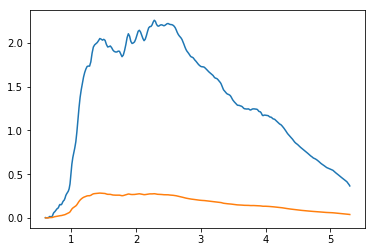

In [26]:
galvec = []
for suffix in ('00', '01'):
    inwave, influx = np.loadtxt( os.path.join(jwstdir, 'galaxyspec_{}.txt'.format(suffix)), unpack=True)

    tt = Table.read( os.path.join(jwstdir, 'gal{}'.format(suffix), 'lineplot', 'lineplot_extracted_flux.fits') )
    
    plt.plot(tt['WAVELENGTH'], tt['extracted_flux'])

    #plt.plot(tt['WAVELENGTH'], tt['extracted_flux'] / np.interp(tt['WAVELENGTH'], inwave, influx), alpha=0.5)
    #plt.xlim(0.5, 0.9)
    

In [ ]:
# Properties to check: Stellar Mass, Age, Metallicity

# Six models:
#   tau=0, Z=Zsun, z=1.5
#   tau=0, Z=Zsun, z=2.5
#   tau=3, Z=Zsun, z=1.5
#   tau=3, Z=Zsun, z=2.5
#   tau=0, Z=0.2Zsun, z=1.5
#   tau=3, Z=0.2Zsun, z=1.5

# Figures:
#  2-panel with input photometry and SED and maximum likelihood
#  triangle plot

# [8/5/17, 10:20:57 AM] Anthony H Gonzalez: Properties to check: Stellar Mass, Age, Metallicity
# [8/5/17, 10:23:00 AM] Anthony H Gonzalez: Filters: z<2   F2100W, F444W, F277W, F150W, F090W
# [8/5/17, 10:23:19 AM] Anthony H Gonzalez: z>2: F2550W, F444W, F277W, F150W, F090W
# [8/5/17, 10:24:48 AM] Anthony H Gonzalez: Adam had calculated for 1200S SNR=6 at L below 4000A break, For F150W, F277W, F444W the SNR is very high (20 at L*+3 in 2 min), For MIRI, baseline SNR=7 for L.
# [8/5/17, 10:25:36 AM] Anthony H Gonzalez: …actually, I went back for NIRCam and we set it to SNR=5 at M*+2

#### Check that the S/N varies with sqrt(mass).

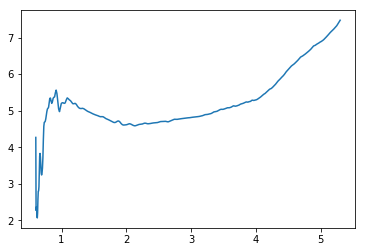

In [33]:
mass11 = Table.read( os.path.join(jwstdir, 'gal00', 'lineplot', 'lineplot_sn.fits') )
mass10 = Table.read( os.path.join(jwstdir, 'gal01', 'lineplot', 'lineplot_sn.fits') )
plt.plot(mass10['WAVELENGTH'], mass11['sn'] / mass10['sn'])

In [34]:
np.sqrt(10)

3.1622776601683795